In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Re

In [ ]:
# JAVA_HOME 환경변수 설정하기

%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
from konlpy.tag import Okt
okt=Okt()

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 플레이스토어 netflix 데이러 로드
netflix = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bd34_project03/play_netflix.csv')

In [ ]:
netflix.head()

,Unnamed: 0,userName,content,score,at
0,0,vgn0509,"미드, 영화 보면서 영어공부용으로 잘 사용하고 있습니다. 다만, 모바일에서 뒤로가기...",4,2022-06-21 09:31:49
1,1,윤서영,전체적으로 잘 보고있긴하지만 불편한 점이 있어 건의드립니다. 멤버쉽 해지하고나서 나...,3,2022-06-26 14:56:13
2,2,nhi 03,"요즘 보고 싶은 콘텐츠,흥미로운 콘텐츠가 여럿 들어와서 정말 좋습니다! 그런데 혹시...",5,2022-06-12 21:00:08
3,3,가뷰,"불편한 점이 소비자 입장에서는 눈에 띄일 수 밖에 없죠. 첫번째, 번역이 정확하지 ...",3,2022-06-04 17:56:41
4,4,샤인시티,넷플릭스 1년 가까이 이용중인데 타사 플랫폼보다 컨텐츠도 많고 여러기능들이 있어 저...,5,2022-05-26 13:34:19


In [ ]:
netflix['content'].head()

0    미드, 영화 보면서 영어공부용으로 잘 사용하고 있습니다. 다만, 모바일에서 뒤로가기...
1    전체적으로 잘 보고있긴하지만 불편한 점이 있어 건의드립니다. 멤버쉽 해지하고나서 나...
2    요즘 보고 싶은 콘텐츠,흥미로운 콘텐츠가 여럿 들어와서 정말 좋습니다! 그런데 혹시...
3    불편한 점이 소비자 입장에서는 눈에 띄일 수 밖에 없죠. 첫번째, 번역이 정확하지 ...
4    넷플릭스 1년 가까이 이용중인데 타사 플랫폼보다 컨텐츠도 많고 여러기능들이 있어 저...
Name: content, dtype: object

In [ ]:
type(netflix['content'])

pandas.core.series.Series

In [ ]:
# 전체 리뷰들을 한 문자열로 통합

reviews = ''

for i in netflix['content'] : 
  reviews = reviews + i + '\n'

TypeError: ignored

In [ ]:
type(reviews)

str

In [16]:
# 전체 리뷰들을 okt를 이용하여 토큰화
tokens = okt.morphs(reviews)

In [ ]:
tokens[:10]

['화면', '회전', '기능', '을', '일부러', '안', '넣으시는건', '가요', '?', '충전']

In [ ]:
import nltk

In [ ]:
result = nltk.Text(tokens)
print(len(result.tokens))       # 전체 토큰의 갯수
print(len(set(result.tokens)))  # 중복을 제거한 토큰의 갯수(총 단어의 갯수)

156146
15125


In [ ]:
# 가장 많이 등장하는 토큰들
result.vocab().most_common(100)

[('\n', 7656),
 ('.', 3984),
 ('이', 3931),
 ('가', 1966),
 ('도', 1782),
 ('에', 1597),
 ('쿠팡', 1415),
 ('?', 1308),
 ('화면', 1135),
 ('안', 1056),
 ('을', 1040),
 ('..', 998),
 ('로그인', 996),
 ('은', 955),
 ('로', 951),
 ('너무', 884),
 ('는', 854),
 ('으로', 853),
 ('앱', 842),
 ('만', 794),
 (',', 790),
 ('를', 781),
 ('...', 755),
 ('플레이', 711),
 ('좀', 699),
 ('왜', 678),
 ('요', 659),
 ('잘', 614),
 ('자막', 604),
 ('에서', 600),
 ('들', 594),
 ('영상', 578),
 ('다', 556),
 ('와우', 538),
 ('재생', 536),
 ('영화', 533),
 ('좋아요', 499),
 ('하고', 487),
 ('못', 467),
 ('해주세요', 467),
 ('기능', 460),
 ('컨텐츠', 452),
 ('것', 438),
 ('티비', 428),
 ('수', 427),
 ('볼', 421),
 ('사용', 414),
 ('계속', 402),
 ('할', 395),
 ('한', 389),
 ('다시', 368),
 ('회원', 358),
 ('나', 355),
 ('업데이트', 352),
 ('때', 339),
 ('어플', 337),
 ('축구', 331),
 ('게', 324),
 ('인데', 323),
 ('드라마', 321),
 ('!', 319),
 ('설치', 308),
 ('의', 307),
 ('중', 306),
 ('개선', 305),
 ('무료', 303),
 ('거', 294),
 ('입니다', 290),
 ('가입', 290),
 ('더', 285),
 ('경기', 285),
 ('서비스', 280),
 ('보

In [ ]:
# 품사가 명사인 것만 추출
nouns = okt.nouns(reviews)

In [ ]:
nouns[:10]

['화면', '회전', '기능', '일부러', '가요', '충전', '충전', '잭', '방향', '때문']

In [ ]:
# 전체 토큰과 품사를 묶어서 추출
review_pos = okt.pos(reviews)

In [ ]:
type(review_pos)

list

In [ ]:
review_pos[:50]

[('화면', 'Noun'),
 ('회전', 'Noun'),
 ('기능', 'Noun'),
 ('을', 'Josa'),
 ('일부러', 'Noun'),
 ('안', 'VerbPrefix'),
 ('넣으시는건', 'Verb'),
 ('가요', 'Noun'),
 ('?', 'Punctuation'),
 ('충전', 'Noun'),
 ('하면서', 'Verb'),
 ('봐야하는데', 'Verb'),
 ('충전', 'Noun'),
 ('잭', 'Noun'),
 ('방향', 'Noun'),
 ('때문', 'Noun'),
 ('에', 'Josa'),
 ('굉장히', 'Adjective'),
 ('불편하네요', 'Adjective'),
 ('.', 'Punctuation'),
 ('정말', 'Noun'),
 ('기본', 'Noun'),
 ('적', 'Suffix'),
 ('인', 'Josa'),
 ('기능', 'Noun'),
 ('인데', 'Josa'),
 ('없다는게', 'Adjective'),
 ('놀랍네요', 'Verb'),
 ('.', 'Punctuation'),
 ('화면', 'Noun'),
 ('잠금을', 'Verb'),
 ('3초', 'Number'),
 ('간', 'Noun'),
 ('눌러', 'Verb'),
 ('아무리', 'Adverb'),
 ('풀어', 'Verb'),
 ('봐도', 'Verb'),
 ('화면', 'Noun'),
 ('회전', 'Noun'),
 ('이', 'Josa'),
 ('안됩니다', 'Adjective'),
 ('.', 'Punctuation'),
 ('매우', 'Noun'),
 ('당황', 'Noun'),
 ('스럽네요', 'Adjective'),
 ('.', 'Punctuation'),
 ('그리고', 'Conjunction'),
 ('pc', 'Alpha'),
 ('버전', 'Noun'),
 ('공식', 'Noun')]

In [ ]:
# 품사의 종류

pos_list=[]

for i in review_pos :
  if i[1] not in pos_list :
    pos_list.append(i[1])

pos_list

['Noun',
 'Josa',
 'VerbPrefix',
 'Verb',
 'Punctuation',
 'Adjective',
 'Suffix',
 'Number',
 'Adverb',
 'Conjunction',
 'Alpha',
 'Foreign',
 'Determiner',
 'Modifier',
 'KoreanParticle',
 'Eomi',
 'Exclamation',
 'URL',
 'Hashtag',
 'Email',
 'PreEomi',
 'ScreenName']

In [ ]:
# 토큰과 품사의 튜플들의 리스트를 데이터 프레임으로 변환
pos_df = pd.DataFrame(review_pos)
pos_df.columns = ['token', 'pos']
pos_df.head()

,token,pos
0,화면,Noun
1,회전,Noun
2,기능,Noun
3,을,Josa
4,일부러,Noun


In [ ]:
noun = pos_df[pos_df['pos']== 'Noun']['token']
josa = pos_df[pos_df['pos']== 'Josa']['token']
verbprefix = pos_df[pos_df['pos']== 'Verbprefix']['token']
verb = pos_df[pos_df['pos']== 'Verb']['token']
punctuation = pos_df[pos_df['pos']== 'Punctuation']['token']
adjective = pos_df[pos_df['pos']== 'Adjective']['token']
suffix = pos_df[pos_df['pos']== 'Suffix']['token']
number = pos_df[pos_df['pos']== 'Number']['token']
adverb = pos_df[pos_df['pos']== 'Adverb']['token']
conjunction = pos_df[pos_df['pos']== 'Conjunction']['token']
alpha = pos_df[pos_df['pos']== 'Alpha']['token']
foreign = pos_df[pos_df['pos']== 'Foreign']['token']
determiner = pos_df[pos_df['pos']== 'Determiner']['token']
modifier = pos_df[pos_df['pos']== 'Modifier']['token']
koreanparticle = pos_df[pos_df['pos']== 'KoreanParticle']['token']
eomi = pos_df[pos_df['pos']== 'Eomi']['token']
exclamation = pos_df[pos_df['pos']== 'Exclamation']['token']
url = pos_df[pos_df['pos']== 'URL']['token']
hashtag = pos_df[pos_df['pos']== 'Hashtag']['token']
email = pos_df[pos_df['pos']== 'Email']['token']
preeomi = pos_df[pos_df['pos']== 'PreEomi']['token']
screenname = pos_df[pos_df['pos']== 'ScreenName']['token']

In [ ]:
# 명사 중 가장 자주 등장하는 50개의 단어
noun.value_counts()[:50]

## 불용어 제거는 품사별로 빈출 150을 추린 후 쓸모없는 것 삭제,
## 가장 드물게 등장하는 (빈도 3개 이하인) 단어들 삭제??

쿠팡       1415
화면       1135
로그인       996
앱         842
플레이       711
좀         696
왜         678
자막        604
영상        578
와우        538
재생        535
영화        533
기능        460
컨텐츠       452
것         438
티비        428
볼         414
수         412
사용        411
계속        402
다시        368
회원        358
업데이트      352
때         338
어플        337
축구        331
드라마       321
설치        307
개선        305
무료        300
거         294
가입        290
더         285
경기        285
서비스       280
진짜        274
요         267
이용        258
오류        256
안         252
추가        252
지원        247
배속        243
시청        241
연결        234
보고        234
뭐         230
안드로이드     227
이         224
돈         222
Name: token, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
from gensim import corpora 
from gensim import models
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# 각 플랫폼의 토큰들의 리스트를 원소로 갖는 전체 리스트 생성

In [ ]:
# 쿠팡플레이
coupang = pd.read_csv('play_coupang.csv')

reviews = ''

for i in coupang['content'] : 
  reviews = reviews + i + '\n'

coupang_nouns = okt.nouns(reviews)

In [ ]:
# 디즈니
disney = pd.read_csv('play_diseney.csv')

reviews = ''

for i in disney['content'] : 
  reviews = reviews + i + '\n'

disney_nouns = okt.nouns(reviews)

In [ ]:
total_list = []
total_list.append(coupang_nouns)
total_list.append(disney_nouns)

In [ ]:
print(total_list[0][:5])
print(total_list[1][:5])

['화면', '회전', '기능', '일부러', '가요']
['콘텐츠', '앱', '개선', '앱', '개발자']


In [ ]:
from gensim import corpora 
from gensim import models
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# dictionary 객체 생성
dictionary = corpora.Dictionary(total_list)
print(dictionary)

Dictionary(6715 unique tokens: ['가가', '가게', '가격', '가계', '가금']...)


In [ ]:
# Corpus 생성 (벡터화)
corpus = [dictionary.doc2bow(i) for i in total_list]

In [ ]:
# lda 모델 생성
lda = models.ldamodel.LdaModel(corpus = corpus,
                               id2word = dictionary,
                               num_topics = 20)

In [ ]:
# 주제마다 출현 확률이 높은 단어순으로 출력
for i in lda.show_topics() :
  print(i)

(1, '0.017*"자막" + 0.014*"쿠팡" + 0.012*"화면" + 0.011*"앱" + 0.010*"좀" + 0.010*"로그인" + 0.008*"재생" + 0.008*"영상" + 0.008*"플레이" + 0.007*"왜"')
(2, '0.017*"자막" + 0.015*"화면" + 0.013*"로그인" + 0.013*"앱" + 0.011*"왜" + 0.010*"좀" + 0.009*"재생" + 0.009*"쿠팡" + 0.008*"사용" + 0.007*"플레이"')
(9, '0.016*"화면" + 0.015*"자막" + 0.014*"좀" + 0.012*"로그인" + 0.012*"앱" + 0.011*"쿠팡" + 0.010*"왜" + 0.008*"재생" + 0.008*"기능" + 0.008*"영화"')
(6, '0.017*"쿠팡" + 0.012*"앱" + 0.012*"자막" + 0.012*"화면" + 0.011*"좀" + 0.010*"로그인" + 0.008*"재생" + 0.008*"영화" + 0.008*"기능" + 0.007*"왜"')
(14, '0.018*"앱" + 0.017*"쿠팡" + 0.012*"자막" + 0.012*"좀" + 0.011*"화면" + 0.011*"왜" + 0.009*"재생" + 0.009*"컨텐츠" + 0.009*"플레이" + 0.009*"영화"')
(12, '0.018*"쿠팡" + 0.017*"앱" + 0.017*"자막" + 0.014*"화면" + 0.013*"로그인" + 0.012*"좀" + 0.009*"영화" + 0.009*"플레이" + 0.008*"영상" + 0.008*"왜"')
(18, '0.022*"쿠팡" + 0.015*"로그인" + 0.014*"화면" + 0.012*"앱" + 0.012*"좀" + 0.011*"자막" + 0.010*"왜" + 0.008*"플레이" + 0.007*"것" + 0.007*"영화"')
(19, '0.016*"자막" + 0.013*"화면" + 0.013*"앱" + 0.011*"왜" + 0.010*

In [ ]:
lda.show_topics()

[(8,
  '0.017*"쿠팡" + 0.014*"앱" + 0.013*"자막" + 0.012*"화면" + 0.011*"왜" + 0.010*"좀" + 0.009*"영화" + 0.009*"영상" + 0.008*"볼" + 0.008*"로그인"'),
 (0,
  '0.014*"자막" + 0.014*"앱" + 0.013*"쿠팡" + 0.011*"화면" + 0.009*"로그인" + 0.008*"재생" + 0.008*"좀" + 0.008*"기능" + 0.007*"플레이" + 0.007*"왜"'),
 (5,
  '0.020*"자막" + 0.016*"쿠팡" + 0.012*"화면" + 0.011*"앱" + 0.010*"좀" + 0.009*"로그인" + 0.009*"왜" + 0.008*"재생" + 0.007*"컨텐츠" + 0.007*"플레이"'),
 (7,
  '0.017*"자막" + 0.011*"앱" + 0.011*"화면" + 0.010*"왜" + 0.010*"로그인" + 0.008*"좀" + 0.008*"영상" + 0.007*"쿠팡" + 0.007*"영화" + 0.007*"디즈니"'),
 (14,
  '0.018*"앱" + 0.017*"쿠팡" + 0.012*"자막" + 0.012*"좀" + 0.011*"화면" + 0.011*"왜" + 0.009*"재생" + 0.009*"컨텐츠" + 0.009*"플레이" + 0.009*"영화"'),
 (17,
  '0.016*"쿠팡" + 0.016*"화면" + 0.014*"앱" + 0.011*"자막" + 0.011*"로그인" + 0.010*"영상" + 0.009*"왜" + 0.009*"재생" + 0.009*"플레이" + 0.008*"좀"'),
 (10,
  '0.015*"화면" + 0.015*"앱" + 0.014*"쿠팡" + 0.013*"로그인" + 0.012*"자막" + 0.011*"영상" + 0.009*"기능" + 0.009*"재생" + 0.009*"플레이" + 0.009*"좀"'),
 (16,
  '0.019*"화면" + 0.018*"자막

In [ ]:
lda.get_topic_terms

<bound method LdaModel.get_topic_terms of <gensim.models.ldamodel.LdaModel object at 0x7fde236a6310>>

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=4c83c5fc323a6b2f31268b72b37ef531c9edadff709b51ac4d7b163decbd3c29
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
import pyLDAvis.gensim_models as gensimvis
# pyLDAvis.gensim 이 pyLDAvis.gensim_models로 이름이 변경되었음.

In [ ]:
prepared_data = gensimvis.prepare(lda, corpus, dictionary)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
pyLDAvis.display(prepared_data)

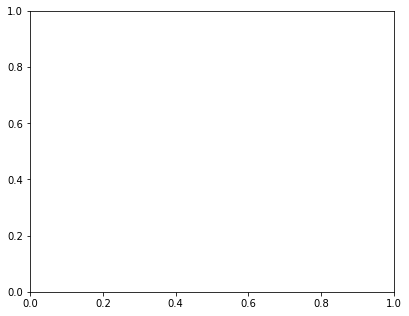

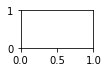

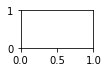

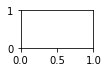

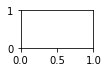

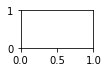

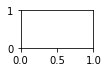

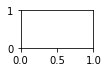

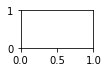

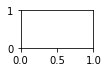

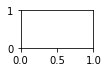

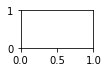

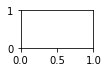

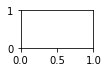

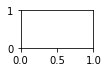

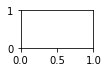

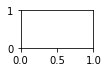

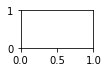

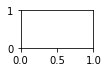

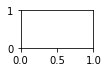

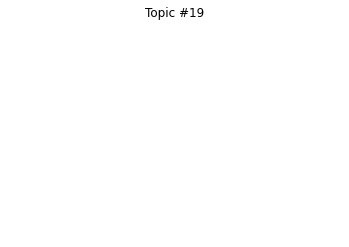

In [ ]:
wc = WordCloud(background_color='black')

plt.figure(figsize=(30,30))

for i in range(lda.num_topics) :
  plt.subplot(5,4,i+1)
  x = dict(lda.show_topic(i,200))
  im = wc.generate_from_frequencies(x)
  plt.show(im)
  plt.axis("off")
  plt.title("Topic #" + str(i))